In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ushuaia ar
hobart au
rikitea pf
sisimiut gl
aasiaat gl
taolanaro mg
avarua ck
kapaa us
shemursha ru
burnie au
cape town za
chagoda ru
puerto ayora ec
manjeshwar in
nizhneyansk ru
manavalakurichi in
nikolskoye ru
rikitea pf
dikson ru
thompson ca
clyde river ca
bani walid ly
houma cn
cherskiy ru
kavieng pg
vanimo pg
mataura pf
altamira br
onega ru
port hedland au
kapaa us
hermanus za
portoferraio it
hithadhoo mv
zacualpan mx
punta arenas cl
sandwick gb
albany au
mys shmidta ru
sao filipe cv
bartica gy
castro cl
ushuaia ar
bairiki ki
taolanaro mg
cidreira br
biak id
bauchi ng
dikson ru
busselton au
talnakh ru
bathsheba bb
ushuaia ar
okhotsk ru
rikitea pf
sabha ly
palmer us
illoqqortoormiut gl
iralaya hn
rikitea pf
nikolskoye ru
georgetown sh
cape town za
kaitangata nz
kloulklubed pw
dyersburg us
rikitea pf
ushuaia ar
pevek ru
albany au
butaritari ki
punta arenas cl
hofn is
severo-kurilsk ru
atuona pf
port hedland au
salalah om
takoradi gh
mahebourg mu
bethel us
ushuaia ar
sansai th
qaanaa

tiksi ru
hermanus za
mehamn no
bayeux fr
vaini to
ushuaia ar
sitka us
guerrero negro mx
saldanha za
upernavik gl
airai pw
jamestown sh
kodiak us
busselton au
mar del plata ar
pangnirtung ca
beaufort my
thano bula khan pk
kaeo nz
hermanus za
rikitea pf
siocon ph
fuyang cn
mys shmidta ru
ordzhonikidze ua
peniche pt
provideniya ru
belushya guba ru
mys shmidta ru
kazalinsk kz
great falls us
rikitea pf
rikitea pf
mahebourg mu
vaini to
chokurdakh ru
barrow us
la asuncion ve
avarua ck
mataura pf
rikitea pf
ilulissat gl
sobolevo ru
ahipara nz
mar del plata ar
san rafael ar
magistralnyy ru
nantucket us
sobolevo ru
pimentel pe
hobart au
honiara sb
hamilton bm
rikitea pf
topsham us
bredasdorp za
belushya guba ru
ust-karsk ru
faanui pf
provideniya ru
atuona pf
atuona pf
samusu ws
ushuaia ar
sao miguel do araguaia br
ostersund se
albany au
port elizabeth za
bambous virieux mu
atuona pf
georgetown sh
pionerskiy ru
turbat pk
iqaluit ca
qiongshan cn
albany au
san jose cr
maues br
cape town za
hermanus

shimoda jp
barbar sd
marcona pe
dikson ru
port alfred za
deulgaon raja in
jamestown sh
barrow us
barrow us
tiksi ru
hilo us
ancud cl
rikitea pf
ixtapa mx
rikitea pf
krumbach de
pasni pk
bayji iq
bluff nz
sangar ru
avarua ck
makakilo city us
hobart au
ulaangom mn
kismayo so
qaanaaq gl
amderma ru
pisco pe
kangaatsiaq gl
dukat ru
kuusamo fi
buraydah sa
victoria sc
hobart au
deer lake ca
bambous virieux mu
beloretsk ru
faanui pf
port alfred za
vaini to
kitimat ca
vaini to
bluff nz
vancouver ca
ponta do sol cv
hobart au
barentsburg sj
hobart au
atambua id
thompson ca
neiafu to
nalut ly
vila franca do campo pt
pacifica us
alice springs au
ushuaia ar


In [6]:
# Starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

   # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

len(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | sisimiut
Processing Record 5 of Set 1 | aasiaat
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | shemursha
Processing Record 10 of Set 1 | burnie
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | chagoda
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | manjeshwar
Processing Record 15 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1 | manavalakurichi
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | clyde river
Processing Record 21 of Set 1 | bani walid
Processing Record 22 

Processing Record 38 of Set 4 | salinopolis
Processing Record 39 of Set 4 | shentala
Processing Record 40 of Set 4 | abu samrah
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | nuuk
Processing Record 43 of Set 4 | adelaide
Processing Record 44 of Set 4 | ilebo
Processing Record 45 of Set 4 | wa
City not found. Skipping...
Processing Record 46 of Set 4 | upington
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | alta floresta
Processing Record 49 of Set 4 | honningsvag
Processing Record 50 of Set 4 | ancud
Processing Record 1 of Set 5 | leningradskiy
Processing Record 2 of Set 5 | catuday
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | lagoa
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | ploemeur
Processing Record 7 of Set 5 | cabo san lucas
Processing Record 8 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 9 of Set 5 | bluff
Processing Record 10 of Set 5 | santa eulalia 

Processing Record 25 of Set 8 | pionerskiy
Processing Record 26 of Set 8 | turbat
Processing Record 27 of Set 8 | qiongshan
Processing Record 28 of Set 8 | maues
Processing Record 29 of Set 8 | kilindoni
Processing Record 30 of Set 8 | chililabombwe
Processing Record 31 of Set 8 | jumla
Processing Record 32 of Set 8 | kieta
Processing Record 33 of Set 8 | paramonga
Processing Record 34 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 35 of Set 8 | maxixe
Processing Record 36 of Set 8 | farmington
Processing Record 37 of Set 8 | madruga
Processing Record 38 of Set 8 | limbang
Processing Record 39 of Set 8 | torbat-e jam
Processing Record 40 of Set 8 | hachinohe
Processing Record 41 of Set 8 | mentok
City not found. Skipping...
Processing Record 42 of Set 8 | comodoro rivadavia
Processing Record 43 of Set 8 | nouadhibou
Processing Record 44 of Set 8 | innisfail
Processing Record 45 of Set 8 | sinnamary
Processing Record 46 of Set 8 | nioro
Processing Record 47 of Set 8

Processing Record 18 of Set 12 | leh
Processing Record 19 of Set 12 | port macquarie
Processing Record 20 of Set 12 | muriwai beach
Processing Record 21 of Set 12 | harnosand
Processing Record 22 of Set 12 | cocobeach
Processing Record 23 of Set 12 | sayla
Processing Record 24 of Set 12 | gornopravdinsk
Processing Record 25 of Set 12 | bhadrachalam
Processing Record 26 of Set 12 | lapua
Processing Record 27 of Set 12 | haines junction
Processing Record 28 of Set 12 | lasa
Processing Record 29 of Set 12 | narsaq
Processing Record 30 of Set 12 | malatya
Processing Record 31 of Set 12 | naryan-mar
Processing Record 32 of Set 12 | banda aceh
Processing Record 33 of Set 12 | kingisepp
Processing Record 34 of Set 12 | bubaque
Processing Record 35 of Set 12 | primorskiy
Processing Record 36 of Set 12 | inhambane
Processing Record 37 of Set 12 | sigli
Processing Record 38 of Set 12 | topolovgrad
Processing Record 39 of Set 12 | wad rawah
Processing Record 40 of Set 12 | york
Processing Record 

573

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.26,62,40,11.50,AR,2022-03-11 04:38:57
1,Hobart,-42.8794,147.3294,71.02,46,75,8.05,AU,2022-03-11 04:36:49
2,Rikitea,-23.1203,-134.9692,78.44,71,79,6.08,PF,2022-03-11 04:38:56
3,Sisimiut,66.9395,-53.6735,-11.61,93,22,4.81,GL,2022-03-11 04:41:45
4,Aasiaat,68.7098,-52.8699,-12.33,100,99,4.79,GL,2022-03-11 04:41:46
5,Avarua,-21.2078,-159.7750,78.85,89,75,3.44,CK,2022-03-11 04:39:08
6,Kapaa,22.0752,-159.3190,76.98,79,20,9.22,US,2022-03-11 04:38:55
7,Shemursha,54.8866,47.5189,-0.31,99,90,7.14,RU,2022-03-11 04:41:46
8,Burnie,-41.0667,145.9167,64.60,55,13,8.30,AU,2022-03-11 04:41:46
9,Cape Town,-33.9258,18.4232,68.11,86,0,2.30,ZA,2022-03-11 04:35:16


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-03-11 04:38:57,-54.8000,-68.3000,53.26,62,40,11.50
1,Hobart,AU,2022-03-11 04:36:49,-42.8794,147.3294,71.02,46,75,8.05
2,Rikitea,PF,2022-03-11 04:38:56,-23.1203,-134.9692,78.44,71,79,6.08
3,Sisimiut,GL,2022-03-11 04:41:45,66.9395,-53.6735,-11.61,93,22,4.81
4,Aasiaat,GL,2022-03-11 04:41:46,68.7098,-52.8699,-12.33,100,99,4.79
5,Avarua,CK,2022-03-11 04:39:08,-21.2078,-159.7750,78.85,89,75,3.44
6,Kapaa,US,2022-03-11 04:38:55,22.0752,-159.3190,76.98,79,20,9.22
7,Shemursha,RU,2022-03-11 04:41:46,54.8866,47.5189,-0.31,99,90,7.14
8,Burnie,AU,2022-03-11 04:41:46,-41.0667,145.9167,64.60,55,13,8.30
9,Cape Town,ZA,2022-03-11 04:35:16,-33.9258,18.4232,68.11,86,0,2.30


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

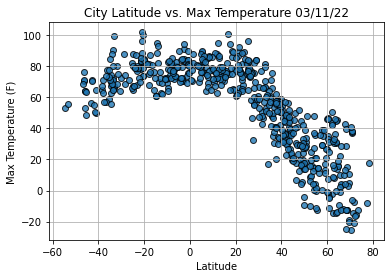

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

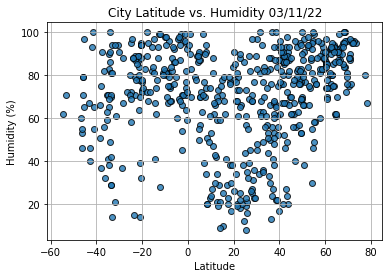

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

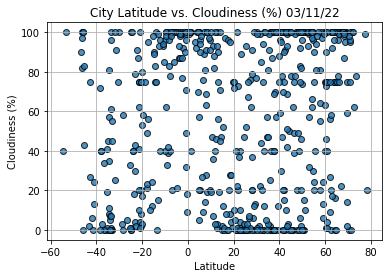

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

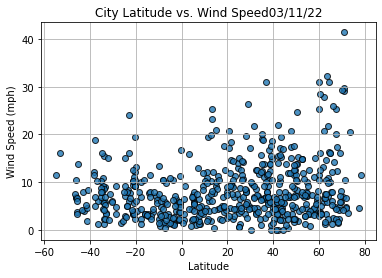

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()